In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def cartoonize_image(image_path):
    # Read the input image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply bilateral filter to reduce noise and smooth the image
    gray_smooth = cv2.bilateralFilter(gray, d=9, sigmaColor=300, sigmaSpace=300)

    # Apply median blur to reduce image details and make it cartoonish
    cartoon = cv2.medianBlur(gray_smooth, 5)

    # Convert cartoon to uint8 for bitwise operations
    cartoon = cv2.cvtColor(cartoon, cv2.COLOR_GRAY2BGR)

    # Create an edge mask using adaptive thresholding
    edges = cv2.adaptiveThreshold(gray_smooth, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

    # Convert the edges to color
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # Combine the cartoon and edges to get the final cartoon image
    cartoon = cv2.bitwise_and(cartoon, edges)

    # Display the original and cartoon images
    plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
    plt.subplot(122), plt.imshow(cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB)), plt.title('Cartoon Image')
    plt.show()

    # Save the cartoon image
    cv2.imwrite('cartoon_image.jpg', cartoon)

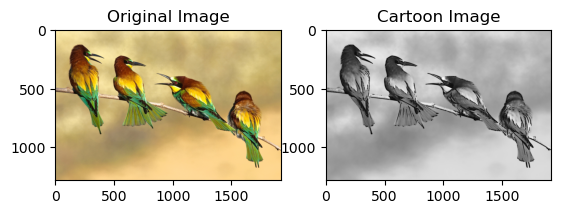

In [9]:
# Provide the path to your image file
image_path = r'C:\Users\Neeraj Bharti\Pictures\bird.jpg'
cartoonize_image(image_path)
